## Credit Card Transactions Fraud Detection

- Dataset_URL : https://www.kaggle.com/mlg-ulb/creditcardfraud


### Import Libraries 

In [35]:
! pip install opendatasets -q

You should consider upgrading via the 'C:\Users\patel\Projects\projects-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import opendatasets as od 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [32]:
# set style for plots
print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Download the Dataset 

In [3]:
dataset_url = "https://www.kaggle.com/mlg-ulb/creditcardfraud"

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in ".\creditcardfraud" (use force=True to force download)


In [5]:
dataset_path = "./creditcardfraud/creditcard.csv"

### Explore the Dataset 

- Dataset contians two csv files.
  1. fraudTrain.csv
  2. fraudTest.csv

In [6]:
### read the datasets 
df = pd.read_csv(dataset_path)

In [7]:
# display max columns 
pd.options.display.max_columns = df.shape[1]

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
df.shape

(284807, 31)

### Data Preprocessing and Cleaning 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### EDA and Data Visualization 

#### Class

In [11]:
target_counts = df["Class"].value_counts(normalize=True)*100
target_counts

0    99.827251
1     0.172749
Name: Class, dtype: float64

- 99% of dataset is not fraudulent where as only 1% of dataset is fraudulent.
- Dataset is highly imbalanced.

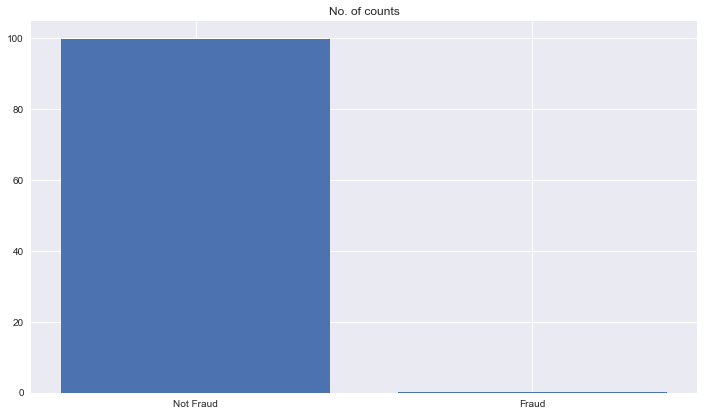

In [34]:
plt.figure(figsize=(10,6))
plt.bar(target_counts.index, target_counts)
plt.title("No. of counts")
plt.xticks(ticks=[0,1], labels=["Not Fraud", "Fraud"])
plt.tight_layout()
plt.show()

#### Amount 

In [15]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

- 75% of Transaction in dataset has amount less than 78 dollar, where as maximum amount transaction was 25,691 dollar. 
- Clearly, distribution of Amount will be right skewed.

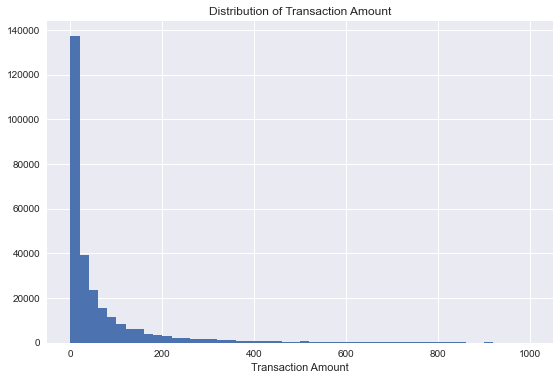

In [36]:
# price distribution Transaction amount < 1000 

plt.hist(df[df.Amount < 1000]['Amount'], bins=50)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.tight_layout()
plt.show()

In [46]:
legit_trans = df[df.Class == 0]
fraud_trans = df[df.Class == 1]

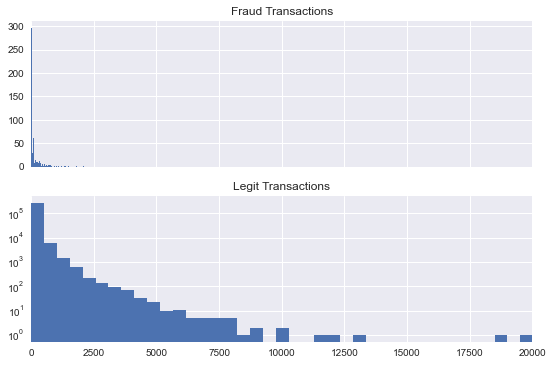

In [52]:
# Distribution of legit and fraud transaction amount

fig, ax = plt.subplots(2,1, sharex=True)
ax[0].hist(fraud_trans.Amount, bins=50)
ax[0].set_title("Fraud Transactions")
ax[1].hist(legit_trans.Amount, bins=50)
ax[1].set_title("Legit Transactions")
plt.xlim((0, 20000))
plt.yscale("log")
plt.show()

In [54]:
### Independent and Dependent Features 
X = df.drop(columns = ["Class"])
y = df.Class

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, GridSearchCV


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [61]:
log_class = LogisticRegression()
param_grid = {"C":10.0**np.arange(-2,3), 'penalty':['l1', 'l2']}
cv=KFold(n_splits=5, shuffle=False, random_state=None)

In [62]:
log_clf = GridSearchCV(log_class, param_grid, cv=cv, n_jobs=-1, scoring='f1_macro')
log_clf.fit(X_train, y_train)

C:\Users\patel\Projects\projects-env\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\patel\Projects\projects-env\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\patel\Projects\projects-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\patel\Projects\projects-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [63]:
y_pred = log_clf.predict(X_test)

In [65]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85254    47]
 [   50    92]]
0.9988647402361809
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.66      0.65      0.65       142

    accuracy                           1.00     85443
   macro avg       0.83      0.82      0.83     85443
weighted avg       1.00      1.00      1.00     85443



## RandomForest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
forest_class = RandomForestClassifier()
forest_class.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
forest_y_pred = forest_class.predict(X_test)

In [72]:
print(confusion_matrix(y_test, forest_y_pred))
print(accuracy_score(y_test, forest_y_pred))
print(classification_report(y_test, forest_y_pred))

[[85296     5]
 [   28   114]]
0.9996137776061234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.96      0.80      0.87       142

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



#### Under Sampling 

In [80]:
from collections import Counter
Counter(y_train)

Counter({0: 199014, 1: 350})

In [82]:
!pip install imblearn -q

You should consider upgrading via the 'C:\Users\patel\Projects\projects-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [86]:
from imblearn.under_sampling import NearMiss 
ns = NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)

C:\Users\patel\Projects\projects-env\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [88]:
Counter(y_train_ns)

Counter({0: 437, 1: 350})

In [89]:
under_forest = RandomForestClassifier()
under_forest.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [90]:
under_y_pred = under_forest.predict(X_test)

In [91]:
print(confusion_matrix(y_test, under_y_pred))
print(accuracy_score(y_test, under_y_pred))
print(classification_report(y_test, under_y_pred))

[[60319 24982]
 [    7   135]]
0.7075360181641562
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     85301
           1       0.01      0.95      0.01       142

    accuracy                           0.71     85443
   macro avg       0.50      0.83      0.42     85443
weighted avg       1.00      0.71      0.83     85443



#### Over Sampling 

In [93]:
from imblearn.over_sampling import RandomOverSampler

In [99]:
os = RandomOverSampler(0.7)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)

C:\Users\patel\Projects\projects-env\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [100]:
Counter(y_train_os)

Counter({0: 199014, 1: 139309})

In [101]:
over_forest = RandomForestClassifier()
over_forest.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [102]:
over_y_pred = over_forest.predict(X_test)

In [103]:
print(confusion_matrix(y_test, over_y_pred))
print(accuracy_score(y_test, over_y_pred))
print(classification_report(y_test, over_y_pred))

[[85297     4]
 [   28   114]]
0.9996254813150287
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.97      0.80      0.88       142

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443

